## Decision Tree

## Fraud-Check Data
### Use Decision Trees to prepare a model on Fraud Data 
**Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"**

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

## 2. Import Data

In [2]:
fraud_data=pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## 3. Data Understanding

### 3.1 Initial Analysis

In [3]:
fraud_data.shape

(600, 6)

In [4]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
fraud_data.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


### 3.2 Data Visualization

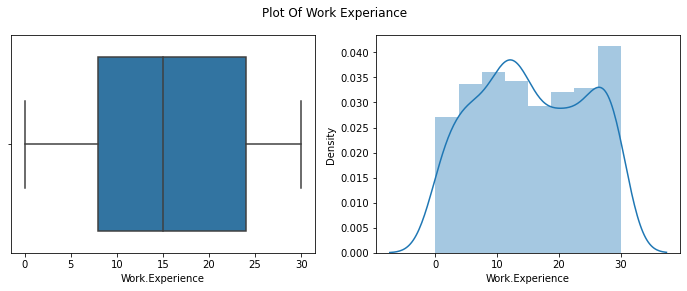

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x='Work.Experience', data=fraud_data)
plt.subplot(1,2,2)
sns.distplot(a=fraud_data['Work.Experience'])
plt.suptitle('Plot Of Work Experiance')
plt.show()

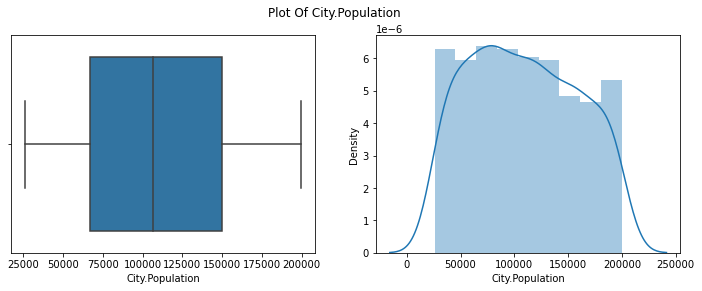

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x='City.Population', data=fraud_data)
plt.subplot(1,2,2)
sns.distplot(a=fraud_data['City.Population'])
plt.suptitle('Plot Of City.Population')
plt.show()

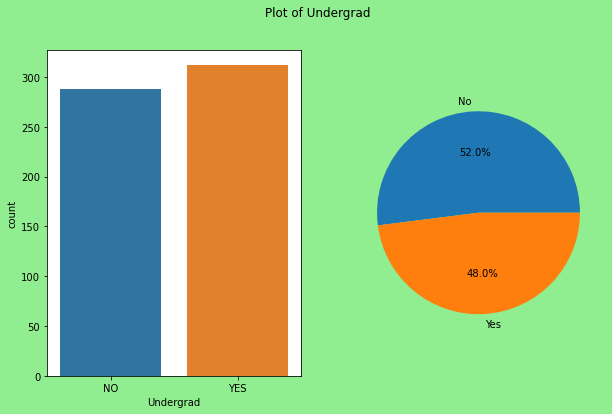

In [9]:
plt.figure(figsize=(10,6),facecolor='LightGreen')
plt.subplot(1,2,1)
sns.countplot(x='Undergrad', data=fraud_data)
plt.subplot(1,2,2)
plt.pie(x=fraud_data['Undergrad'].value_counts(), labels=['No','Yes'], autopct='%2.1f%%')
plt.suptitle('Plot of Undergrad')
plt.show()

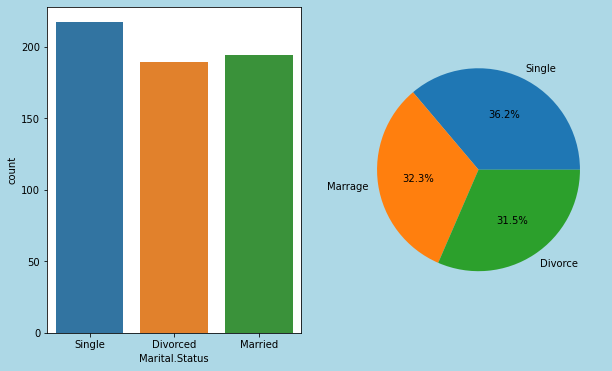

In [10]:
plt.figure(figsize=(10,6),facecolor='LightBlue')
plt.subplot(1,2,1)
sns.countplot(x='Marital.Status', data=fraud_data)
plt.subplot(1,2,2)
plt.pie(x=fraud_data['Marital.Status'].value_counts(), labels=['Single','Marrage','Divorce'], autopct='%2.1f%%')
plt.show()

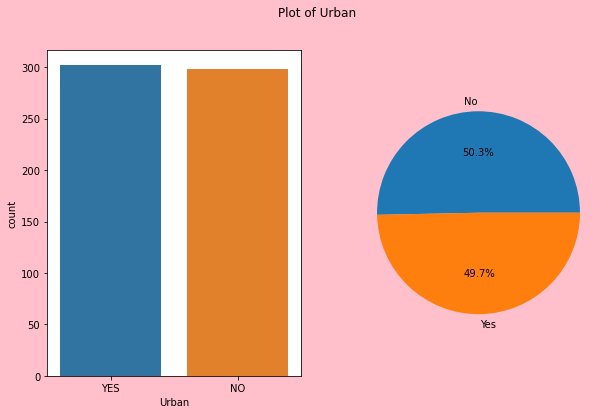

In [11]:
plt.figure(figsize=(10,6),facecolor='Pink')
plt.subplot(1,2,1)
sns.countplot(x='Urban', data=fraud_data)
plt.subplot(1,2,2)
plt.pie(x=fraud_data['Urban'].value_counts(), labels=['No','Yes'], autopct='%2.1f%%')
plt.suptitle('Plot of Urban')
plt.show()

#### Converting taxable_income data <=30000 to Risky and >30000 to Good

In [12]:
fraud_data['Taxable.Income']=fraud_data['Taxable.Income'].apply(lambda x: 'Risky' if x<=30000 else 'Good')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [13]:
fraud_data['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

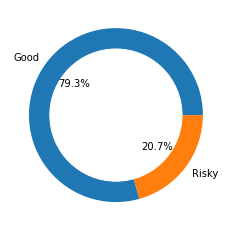

In [14]:
plt.pie(x=fraud_data['Taxable.Income'].value_counts(), labels=['Good','Risky'], autopct='%2.1f%%')
circle=plt.Circle((0,0),0.76,color='white')
get_current_figure=plt.gcf()
get_current_figure.gca().add_artist(circle)
plt.show()

## 4. Data Preparation

In [15]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [16]:
# Converting Categorical Variables to Int using Label Encoder
le=LabelEncoder()
fraud_data[['Undergrad','Marital.Status','Taxable.Income','Urban']]=fraud_data[['Undergrad','Marital.Status','Taxable.Income','Urban']].apply(le.fit_transform)
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [17]:
# Converting Continuous data to Standardization
std_scalar=StandardScaler()
fraud_data[['City.Population','Work.Experience']]=std_scalar.fit_transform(fraud_data[['City.Population','Work.Experience']])
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,-1.178521,-0.629143,1
1,1,0,0,0.508500,0.276370,1
2,0,1,0,1.033109,1.634639,1
3,1,2,0,1.696831,-0.063197,1
4,0,1,0,-1.630532,1.408261,0


## 5. Model Building

In [18]:
X=fraud_data.drop('Taxable.Income', axis=1)
y=fraud_data[['Taxable.Income']]

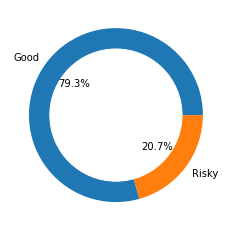

In [19]:
plt.pie(x=y.value_counts(), labels=['Good','Risky'], autopct='%2.1f%%')
circle=plt.Circle((0,0),0.76,color='white')
get_current_figure=plt.gcf()
get_current_figure.gca().add_artist(circle)
plt.show()

In [20]:
# Splitting our data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=10,shuffle=True,stratify=y)

In [21]:
X_train.shape, y_train.shape

((420, 5), (420, 1))

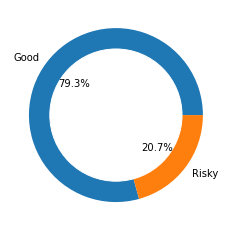

In [22]:
plt.pie(x=y_train.value_counts(), labels=['Good','Risky'], autopct='%2.1f%%')
circle=plt.Circle((0,0),0.76,color='white')
get_current_figure=plt.gcf()
get_current_figure.gca().add_artist(circle)
plt.show()

In [23]:
X_test.shape, y_test.shape

((180, 5), (180, 1))

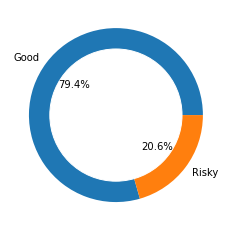

In [24]:
plt.pie(x=y_test.value_counts(), labels=['Good','Risky'], autopct='%2.1f%%')
circle=plt.Circle((0,0),0.76,color='white')
get_current_figure=plt.gcf()
get_current_figure.gca().add_artist(circle)
plt.show()

## 6. Model Testing

In [25]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

### Plot the Tree

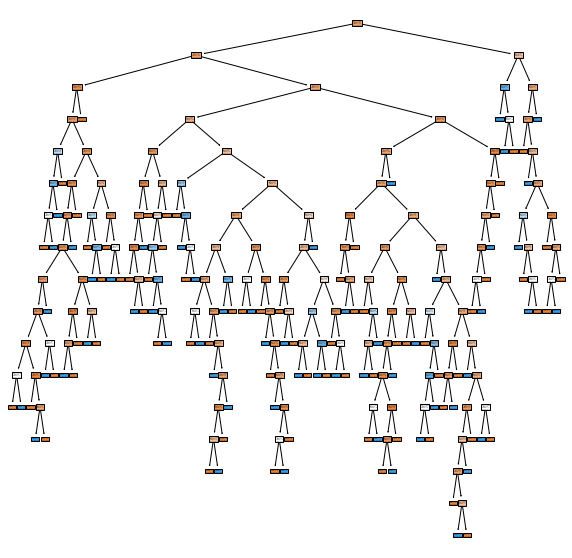

In [26]:
plt.figure(figsize=(10,10))
plot_tree(decision_tree=dt_model, filled=True)
plt.show()

## 7. Model Testing || 8. Model Evaluation

#### For Training Dataset

In [27]:
y_pred_train=dt_model.predict(X_train)

In [28]:
print('Accuracy Score:', accuracy_score(y_train, y_pred_train))

Accuracy Score: 1.0


In [29]:
print('Classification Report:\n', classification_report(y_train, y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00        87

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



In [30]:
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_train))

Confusion Matrix:
 [[333   0]
 [  0  87]]


1.0


Text(0, 0.5, 'True Positive Rate')

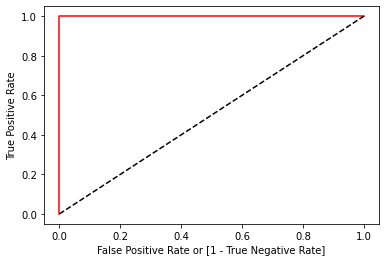

In [31]:
fpr, tpr, thresholds = roc_curve(y_train, dt_model.predict_proba (X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

#### For Testing Dataset

In [32]:
y_pred_test=dt_model.predict(X_test)

In [33]:
print('Accuracy Score:', accuracy_score(y_test, y_pred_test))

Accuracy Score: 0.6333333333333333


In [34]:
print('Classification Report:\n', classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       143
           1       0.22      0.30      0.25        37

    accuracy                           0.63       180
   macro avg       0.51      0.51      0.50       180
weighted avg       0.68      0.63      0.65       180



In [35]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[103  40]
 [ 26  11]]


0.5087885087885088


Text(0, 0.5, 'True Positive Rate')

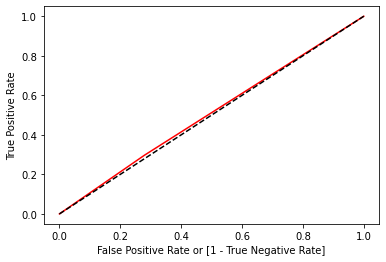

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Here we are facing Overfitting Problem

To overcome this overfitting problem we use **Pruning**

To get best hyperparameter i.e., best value for Pruning we use **Grid Search method**

In [37]:
grid_search=GridSearchCV(estimator=dt_model,
                         param_grid={'criterion':['entropy','gini'],
                                     'max_depth':[2,3,4,5,6,7,8,9,10]})
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 2}
0.7916666666666666


In [38]:
dt_model= DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Plot the Tree

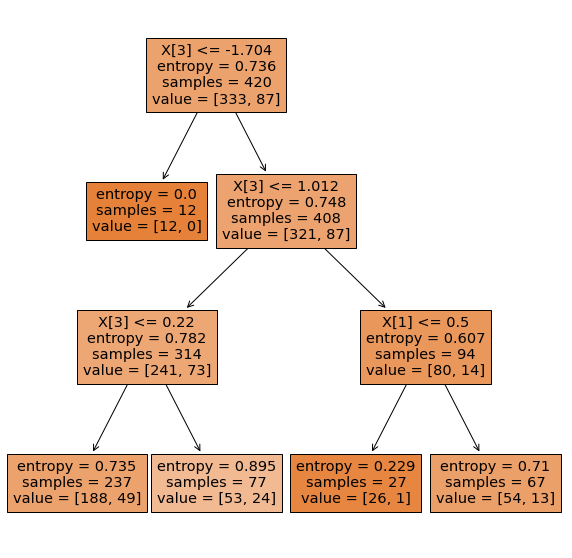

In [39]:
plt.figure(figsize=(10,10))
plot_tree(decision_tree=dt_model, filled=True)
plt.show()

## Model Evaluation

#### For Training data

In [40]:
y_pred_train=dt_model.predict(X_train)

In [41]:
print('Accuracy Score:', accuracy_score(y_train, y_pred_train))

Accuracy Score: 0.7928571428571428


In [42]:
print('Classification Report:\n', classification_report(y_train, y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       333
           1       0.00      0.00      0.00        87

    accuracy                           0.79       420
   macro avg       0.40      0.50      0.44       420
weighted avg       0.63      0.79      0.70       420



In [43]:
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_train))

Confusion Matrix:
 [[333   0]
 [ 87   0]]


0.5


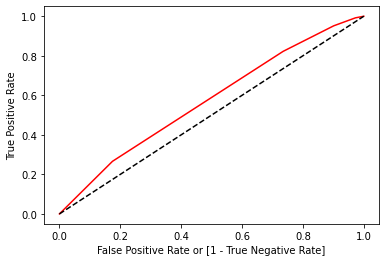

In [44]:
fpr, tpr, thresholds = roc_curve(y, dt_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

#### For Testing Data

In [45]:
y_pred_test=dt_model.predict(X_test)

In [46]:
print('Accuracy Score:', accuracy_score(y_test, y_pred_test))

Accuracy Score: 0.7944444444444444


In [47]:
print('Classification Report:\n', classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.89       143
           1       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180



In [48]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[143   0]
 [ 37   0]]


0.5


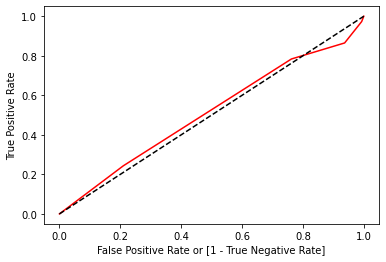

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

### Since we have imbalance data we are facing problems with respect to True Positives

In [50]:
y.value_counts()

Taxable.Income
0                 476
1                 124
dtype: int64

In [51]:
dt_model=DecisionTreeClassifier(criterion='entropy', max_depth=2, class_weight={0:1,1:4})
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 4}, criterion='entropy',
                       max_depth=2)

### Plot the tree

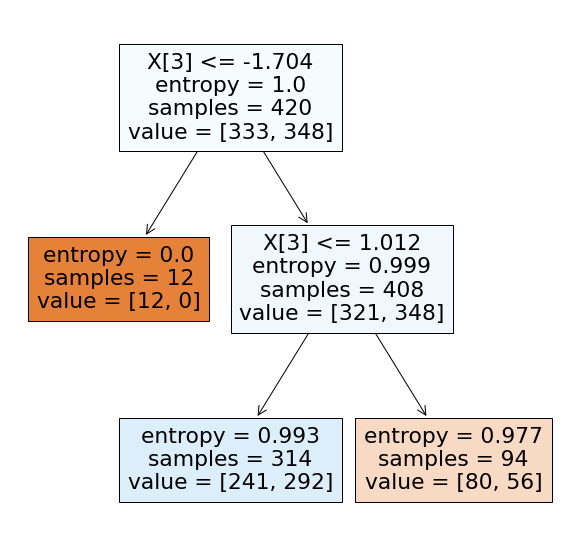

In [52]:
plt.figure(figsize=(10,10))
plot_tree(decision_tree=dt_model, filled=True)
plt.show()

## Model Evaluation

#### For Training data

In [53]:
y_pred_train=dt_model.predict(X_train)

In [54]:
print('Accuracy Score:', accuracy_score(y_train, y_pred_train))

Accuracy Score: 0.39285714285714285


In [55]:
print('Classification Report:\n', classification_report(y_train, y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.28      0.42       333
           1       0.23      0.84      0.36        87

    accuracy                           0.39       420
   macro avg       0.55      0.56      0.39       420
weighted avg       0.74      0.39      0.41       420



In [56]:
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_train))

Confusion Matrix:
 [[ 92 241]
 [ 14  73]]


0.5576783680231956


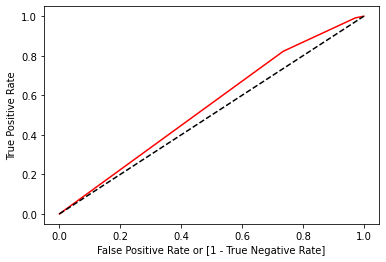

In [57]:
fpr, tpr, thresholds = roc_curve(y, dt_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

#### For Testing Data

In [58]:
y_pred_test=dt_model.predict(X_test)

In [59]:
print('Accuracy Score:', accuracy_score(y_test, y_pred_test))

Accuracy Score: 0.35


In [60]:
print('Classification Report:\n', classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.24      0.37       143
           1       0.21      0.78      0.33        37

    accuracy                           0.35       180
   macro avg       0.51      0.51      0.35       180
weighted avg       0.69      0.35      0.36       180



In [61]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[ 34 109]
 [  8  29]]


0.5107730107730107


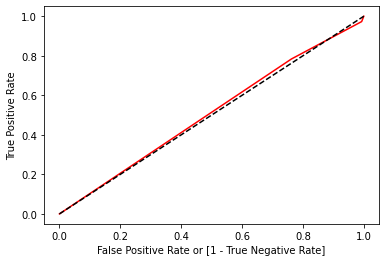

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

### In order to Increase the accuracy of our Model, we use Gradient Boosting Method

In [63]:
gb_classifier=GradientBoostingClassifier(max_depth=3)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

## Model Evaluation

#### For Training data

In [64]:
y_pred_train=gb_classifier.predict(X_train)

In [65]:
print('Accuracy Score:', accuracy_score(y_train, y_pred_train))

Accuracy Score: 0.8595238095238096


In [66]:
print('Classification Report:\n', classification_report(y_train, y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       333
           1       1.00      0.32      0.49        87

    accuracy                           0.86       420
   macro avg       0.92      0.66      0.70       420
weighted avg       0.88      0.86      0.83       420



In [67]:
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_train))

Confusion Matrix:
 [[333   0]
 [ 59  28]]


0.6609195402298851


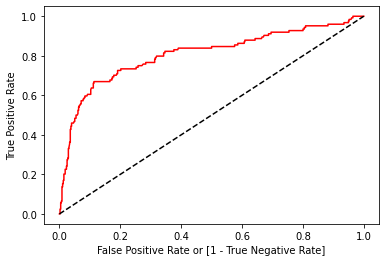

In [68]:
fpr, tpr, thresholds = roc_curve(y, gb_classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

#### For Testing Data

In [69]:
y_pred_test=gb_classifier.predict(X_test)

In [70]:
print('Accuracy Score:', accuracy_score(y_test, y_pred_test))

Accuracy Score: 0.7333333333333333


In [71]:
print('Classification Report:\n', classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.85       143
           1       0.00      0.00      0.00        37

    accuracy                           0.73       180
   macro avg       0.39      0.46      0.42       180
weighted avg       0.62      0.73      0.67       180



In [72]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[132  11]
 [ 37   0]]


0.46153846153846156


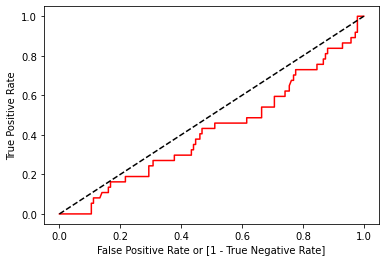

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, gb_classifier.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

### Still we are not able to built the best model... In order to build the best we need to try Tweeking different  Hyperparameters.